<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/think-stats/01_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [1]:
import numpy as np
from os.path import basename, exists

In [2]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

Downloaded thinkstats2.py
Downloaded thinkplot.py
Downloaded nsfg.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [4]:
from collections import Counter

import thinkstats2
import thinkplot
import nsfg

##Distributions

Given a list of values, there are several ways to count the frequency of each value.

In [5]:
t = [1, 2, 3, 4, 5]

You can use a Python dictionary.

In [6]:
hist = {}
for x in t:
  hist[x] = hist.get(x, 0) + 1
hist

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1}

You can use a Counter (which is a dictionary with additional methods):

In [7]:
counter = Counter(t)
counter

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1})

##Representing Histograms

In [8]:
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [9]:
hist.Freq(2)

2

In [10]:
hist[2]

2

In [11]:
hist[4]

0

In [12]:
hist.Values()

dict_keys([1, 2, 3, 5])

In [13]:
for val in sorted(hist.Values()):
  print(val, hist[val])

1 1
2 2
3 1
5 1


In [14]:
for val, freq in hist.Items():
  print(val, freq)

1 1
2 2
3 1
5 1


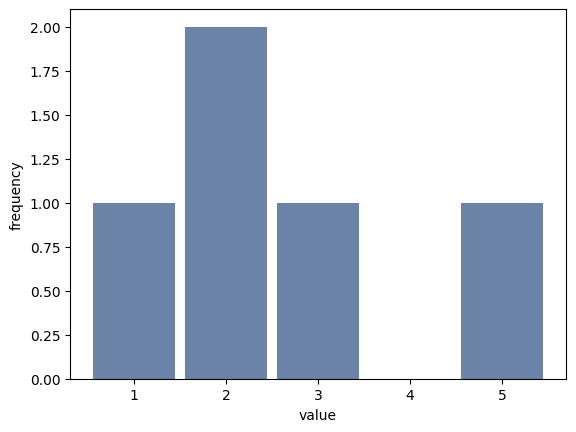

In [15]:
# let's plot histogram
thinkplot.Hist(hist)
thinkplot.Config(xlabel="value", ylabel="frequency")

##Dataset

In [16]:
# let's start by reading the data and selecting records for live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

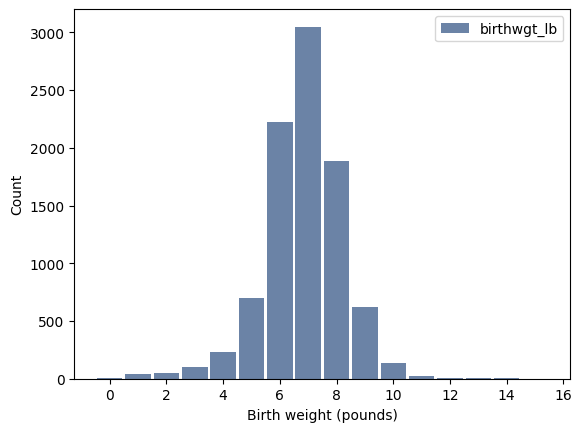

In [17]:
# let's generate and plot the histogram of birthwgt_lb for live births
hist = thinkstats2.Hist(live.birthwgt_lb, label="birthwgt_lb")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="Count")

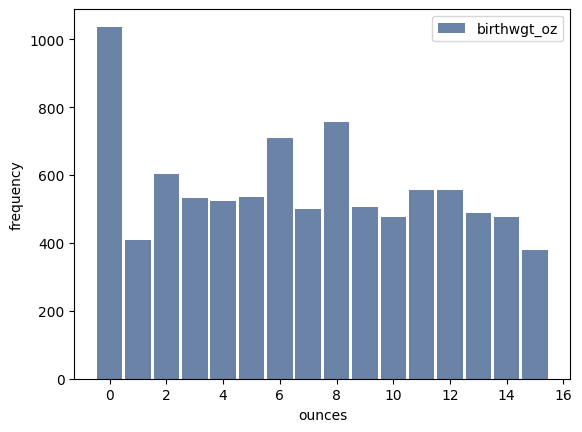

In [18]:
# let's plot the histogram of pregnancy lengths (column prglngth).
hist = thinkstats2.Hist(live.birthwgt_oz, label="birthwgt_oz")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="ounces", ylabel="frequency")

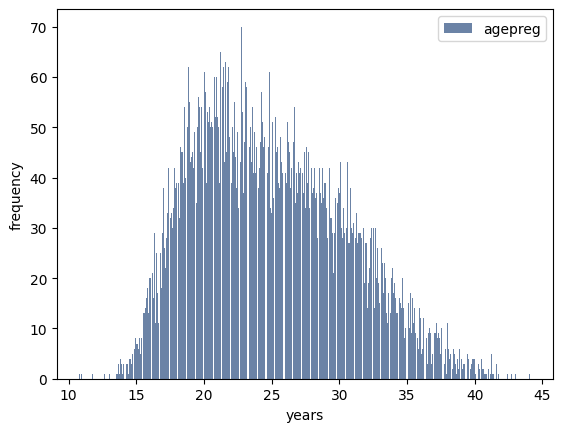

In [19]:
# let's plot the histogram of mother’s age at end of pregnancy
hist = thinkstats2.Hist(live.agepreg, label="agepreg")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="years", ylabel="frequency")

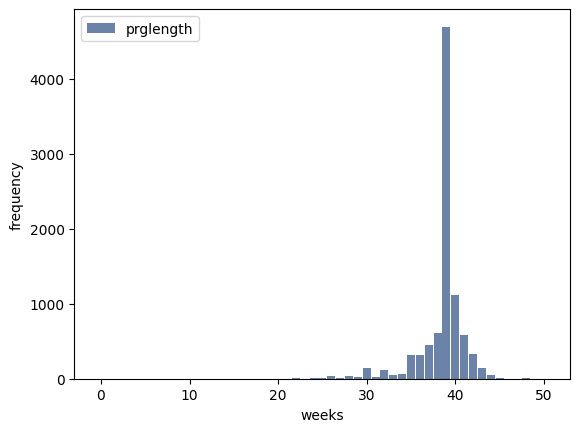

In [20]:
# let's plot the histogram of pregnancy length in weeks
hist = thinkstats2.Hist(live.prglngth, label="prglength")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="weeks", ylabel="frequency")

##Outliers

In [21]:
# Hist provides smallest, which select the lowest values and their frequencies.
for weeks, freq in hist.Smallest(10):
  print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [22]:
# Hist provides largest, which select the largest values and their frequencies.
for weeks, freq in hist.Largest(10):
  print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


In [23]:
# let's select first babies and others using birthord, then compute histograms of pregnancy length for the two groups
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label="first")
other_hist = thinkstats2.Hist(others.prglngth, label="other")

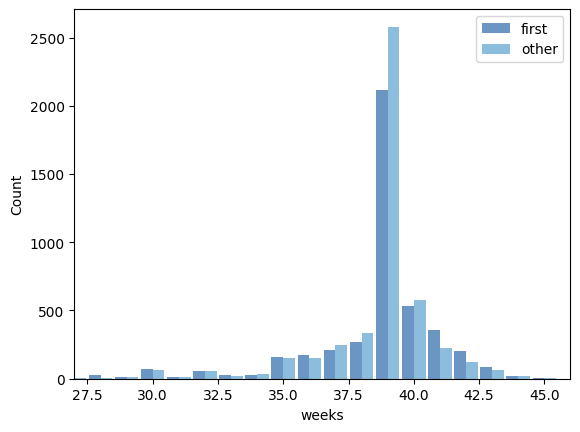

In [24]:
# We can use width and align to plot two histograms side-by-side
width = 0.45
thinkplot.PrePlot(2)

thinkplot.Hist(first_hist, align="right", width=width)
thinkplot.Hist(other_hist, align="left", width=width)
thinkplot.Config(xlabel="weeks", ylabel="Count", xlim=[27, 46])

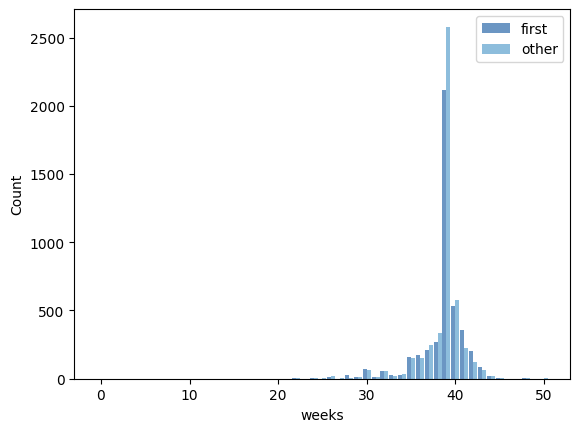

In [25]:
# We can use width and align to plot two histograms side-by-side
width = 0.45
thinkplot.PrePlot(2)

thinkplot.Hist(first_hist, align="right", width=width)
thinkplot.Hist(other_hist, align="left", width=width)
thinkplot.Config(xlabel="weeks", ylabel="Count")

Histograms are useful because they make the most frequent values immediately apparent.
But they are not the best choice for comparing two distributions.

We address this problem using
probability mass functions.

##Summarizing Distributions

In [26]:
# let's compute mean, variance and standard deviation
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

In [27]:
(mean, var, std)

(38.56055968517709, 7.302662067826817, 2.702343810070587)

In [28]:
# let's confirm that std is the square root of var
np.sqrt(var)

2.702343810070587

In [29]:
# Here's are the mean pregnancy lengths for first babies and others
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

In [30]:
# And here's the difference (in weeks):
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

In [31]:
# This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations
def cohen_effect_size(group1, group2):
  diff = group1.mean() - group2.mean()

  var1 = group1.var()
  var2 = group2.var()
  n1, n2 = len(group1), len(group2)

  pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
  d = diff / np.sqrt(pooled_var)
  return d

In [32]:
# let's compute the Cohen effect size for the difference in pregnancy length for first babies and others
ces = cohen_effect_size(firsts.prglngth, others.prglngth)
ces

0.028879044654449834

##Exercises

In [33]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

Downloaded 2002FemResp.dct
Downloaded 2002FemResp.dat.gz


Make a histogram of totincr the total income for the respondent's family.

In [44]:
resp = nsfg.ReadFemResp()

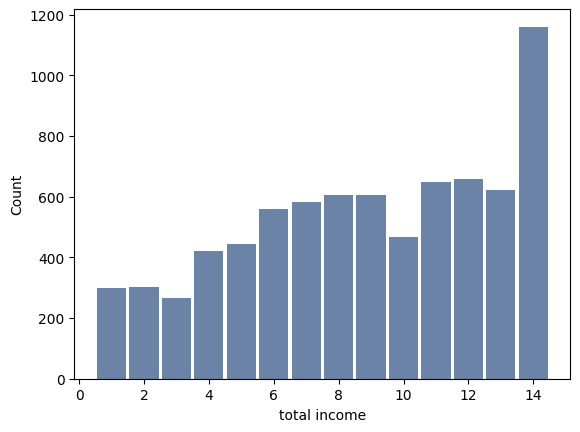

In [58]:
hist = thinkstats2.Hist(resp.totincr)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="total income", ylabel="Count")

Make a histogram of age_r, the respondent's age at the time of interview.

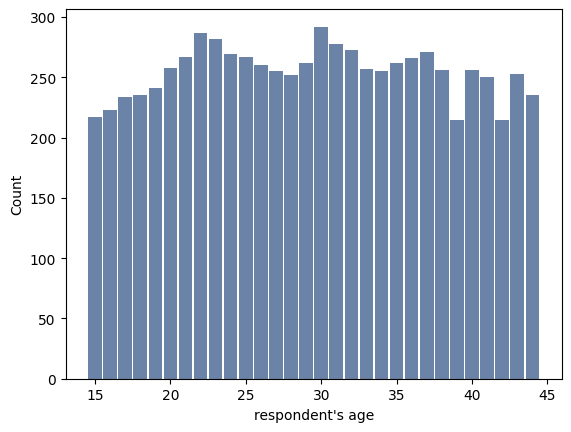

In [59]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="respondent's age", ylabel="Count")

Make a histogram of numfmhh, the number of people in the respondent's household.

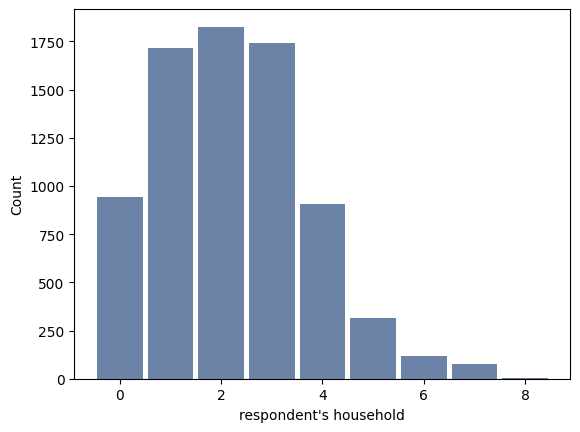

In [60]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="respondent's household", ylabel="Count")

Make a histogram of parity, the number of children borne by the respondent. How would you describe this distribution?

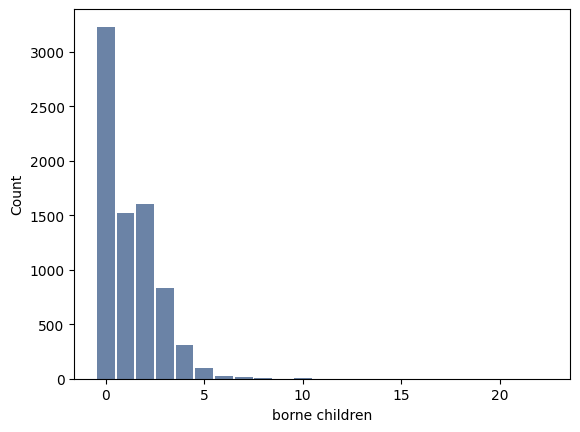

In [61]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist)
thinkplot.Config(xlabel="borne children", ylabel="Count")

Use Hist.Largest to find the largest values of parity.

In [62]:
hist = thinkstats2.Hist(resp.parity)
largest = hist.Largest()
print(largest)

[(22, 1), (16, 1), (10, 3), (9, 2), (8, 8), (7, 15), (6, 29), (5, 95), (4, 309), (3, 828)]
